<a href="https://colab.research.google.com/github/krishnakanth-G/Datascience-with-python/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

## Downlaod and load Datasets

In [ ]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Data loaders

In [ ]:
batch_size = 64

train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Neural Network model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): Softmax(dim=None)
  )
)


## Loss function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

## Training the model

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Find the predictions
        pred = model(X)

        # Find the loss using predictions
        loss = loss_fn(pred, y)

        # clean the gradients
        optimizer.zero_grad()

        # calculate the gradients
        loss.backward()

        # update the parameters
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

## Test the model

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test : \n Accuracy: {(100*correct):>0.2f}%, Avg loss: {test_loss:>8f} \n")

## combine all pieces

In [ ]:
epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-----------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

Epoch 1
-----------------------------
loss: 1.652686  [    0/60000]


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


loss: 1.733434  [ 6400/60000]
loss: 1.628003  [12800/60000]
loss: 1.694794  [19200/60000]
loss: 1.690490  [25600/60000]
loss: 1.637579  [32000/60000]
loss: 1.666391  [38400/60000]
loss: 1.683383  [44800/60000]
loss: 1.645442  [51200/60000]
loss: 1.701884  [57600/60000]
Test : 
 Accuracy: 79.53%, Avg loss: 1.672699 

Epoch 2
-----------------------------
loss: 1.651406  [    0/60000]
loss: 1.731987  [ 6400/60000]
loss: 1.627276  [12800/60000]
loss: 1.692703  [19200/60000]
loss: 1.686220  [25600/60000]
loss: 1.636737  [32000/60000]
loss: 1.666994  [38400/60000]
loss: 1.682886  [44800/60000]
loss: 1.645029  [51200/60000]
loss: 1.700942  [57600/60000]
Test : 
 Accuracy: 79.55%, Avg loss: 1.671647 

Epoch 3
-----------------------------
loss: 1.650377  [    0/60000]
loss: 1.730521  [ 6400/60000]
loss: 1.626445  [12800/60000]
loss: 1.690850  [19200/60000]
loss: 1.681483  [25600/60000]
loss: 1.635991  [32000/60000]
loss: 1.667272  [38400/60000]
loss: 1.682083  [44800/60000]
loss: 1.645164  [5

In [ ]:
img, label = train_data[0]
pred = model(img.to(device))
pred

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([[3.0663e-27, 3.4412e-30, 7.6902e-21, 5.1582e-22, 2.5561e-21, 1.9291e-09,
         4.3743e-22, 9.0214e-10, 2.7357e-14, 1.0000e+00]],
       grad_fn=<SoftmaxBackward>)

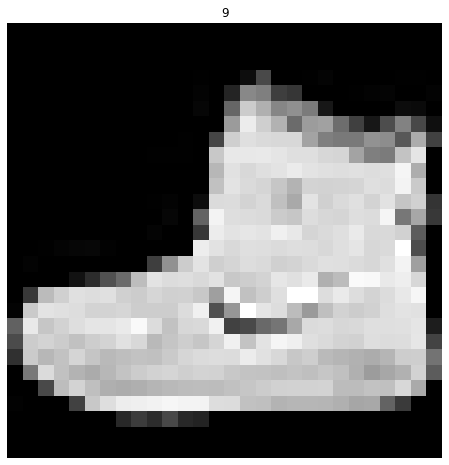

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8))
plt.title(label)
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")
plt.show()